In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ema_workbench
from ema_workbench import Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)



<Logger EMA (DEBUG)>

In [3]:
# import data (samples) 

# import the dike_model_experiments.csv file
df_experiments = pd.read_csv('experiments(no policy).csv')

# import the dike_model_outcomes.csv file
df_outcomes = pd.read_csv('outcomes(no policy).csv')


PRIM 1: Overijssel Expected Annual Damage


In [4]:
# specify x and y variables

# select all uncertainties and policy levers. Therefore, only disregard the last three columns, which don't display usefull information

x_1 = df_experiments.iloc[:, :-3]

# as taregt, look at the Overijssel Expected Annual Damage, where the threshold damage value is set to the maximum 10% percentile of the expected annual damage
y_1 = df_outcomes['Overijssel Expected Annual Damage'] > df_outcomes['Overijssel Expected Annual Damage'].quantile(0.9)

In [5]:
# create first box (x = independent variable, y = dependent variable)

prim_alg = prim.Prim(x_1, y_1, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()


[MainProcess/INFO] 1000 points remaining, containing 100 cases of interest
[MainProcess/INFO] mean: 0.9821428571428571, mass: 0.056, coverage: 0.55, density: 0.9821428571428571 restricted_dimensions: 4


Box inspections

To explore under which conditions the damage is high, three possible boxes are inspected: 
- One with a high density, relatively low coverage and the highest number of restricted dimensions
- One with a moderate density, coverage and number of restricted dimensions
- One with a relatively low density, high coverage and a low number of restricted dimensions

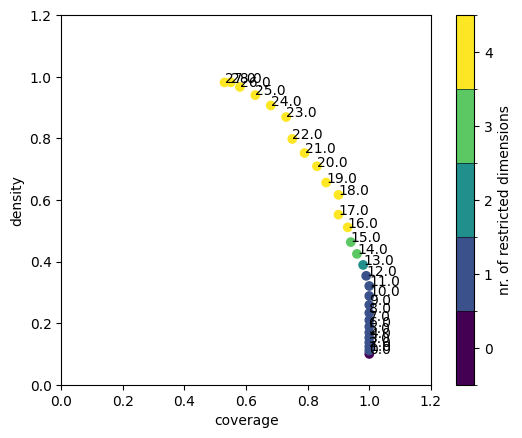

In [6]:
# Plot the density - coverage trade-off

box1.show_tradeoff(annotated=True)
plt.show()

In [8]:
# inspect point - point with a high density and relatively low coverage

point_1_1 = 25
box1.inspect(point_1_1)

coverage     0.630000
density      0.940299
id          25.000000
k           63.000000
mass         0.067000
mean         0.940299
n           67.000000
res_dim      4.000000
Name: 25, dtype: float64

             box 25                                      
                min       max      qp value      qp value
A.5_pfail  0.000873  0.178833           NaN  6.550699e-37
A.1_pfail  0.419023  0.999021  2.861663e-09           NaN
A.3_pfail  0.309302  0.999267  1.252935e-03           NaN
A.2_pfail  0.132408  0.999393  7.540053e-03           NaN



[None]

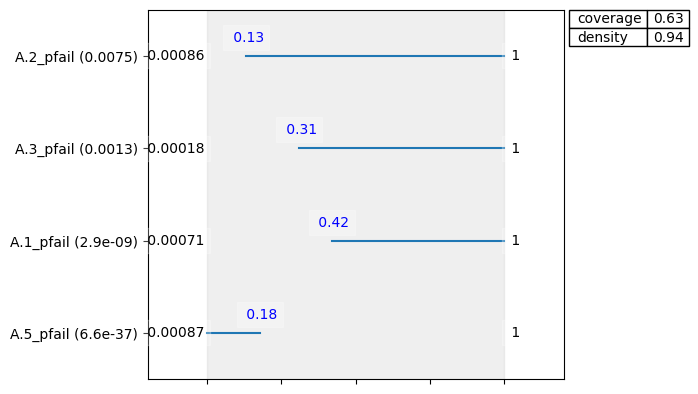

In [9]:
# inspect box limits for the selected point
box1.inspect(point_1_1, style='graph')
plt.show()

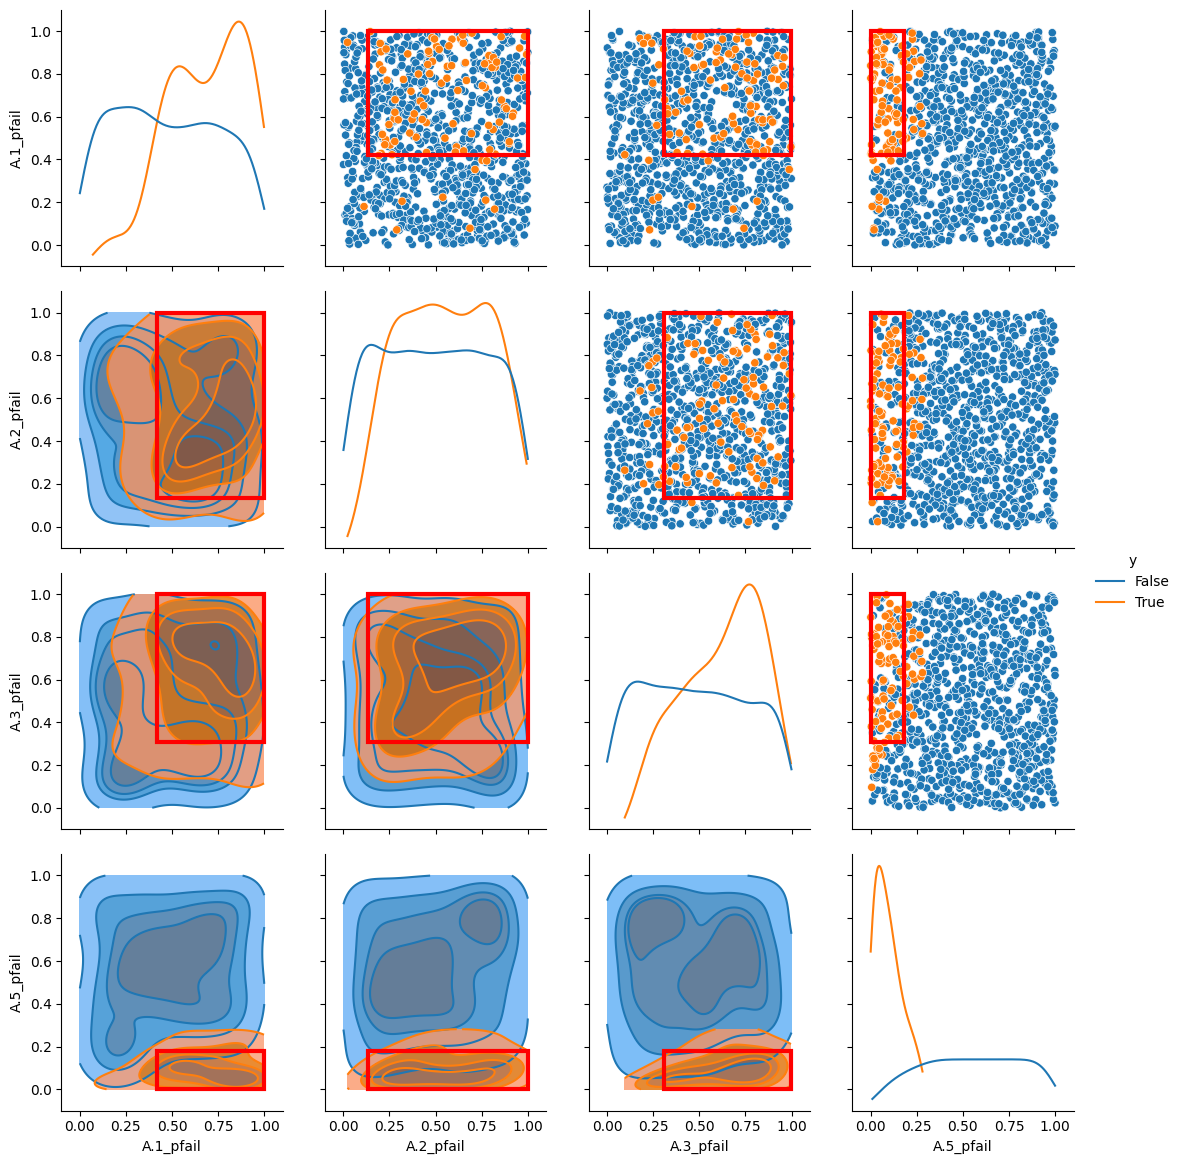

In [79]:
#Further inspect the box limits using pair wise 
box1.select(point_1_1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [10]:
# inspect point - point with an average density and coverage

point_1_2 = 15
box1.inspect(point_1_2)

coverage      0.940000
density       0.463054
id           15.000000
k            94.000000
mass          0.203000
mean          0.463054
n           203.000000
res_dim       3.000000
Name: 15, dtype: float64

             box 15                                  
                min       max  qp value      qp value
A.5_pfail  0.000873  0.280287       NaN  5.520851e-30
A.1_pfail  0.193934  0.999021  0.018725           NaN
A.3_pfail  0.125412  0.999267  0.159515           NaN



[None]

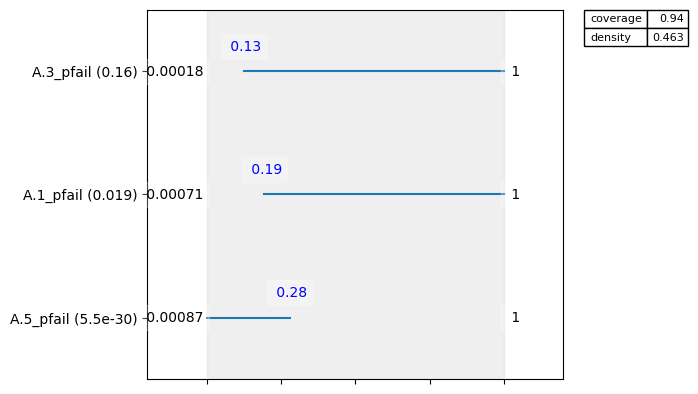

In [11]:
# inspect box limits for the selected point
box1.inspect(point_1_2, style='graph')
plt.show()

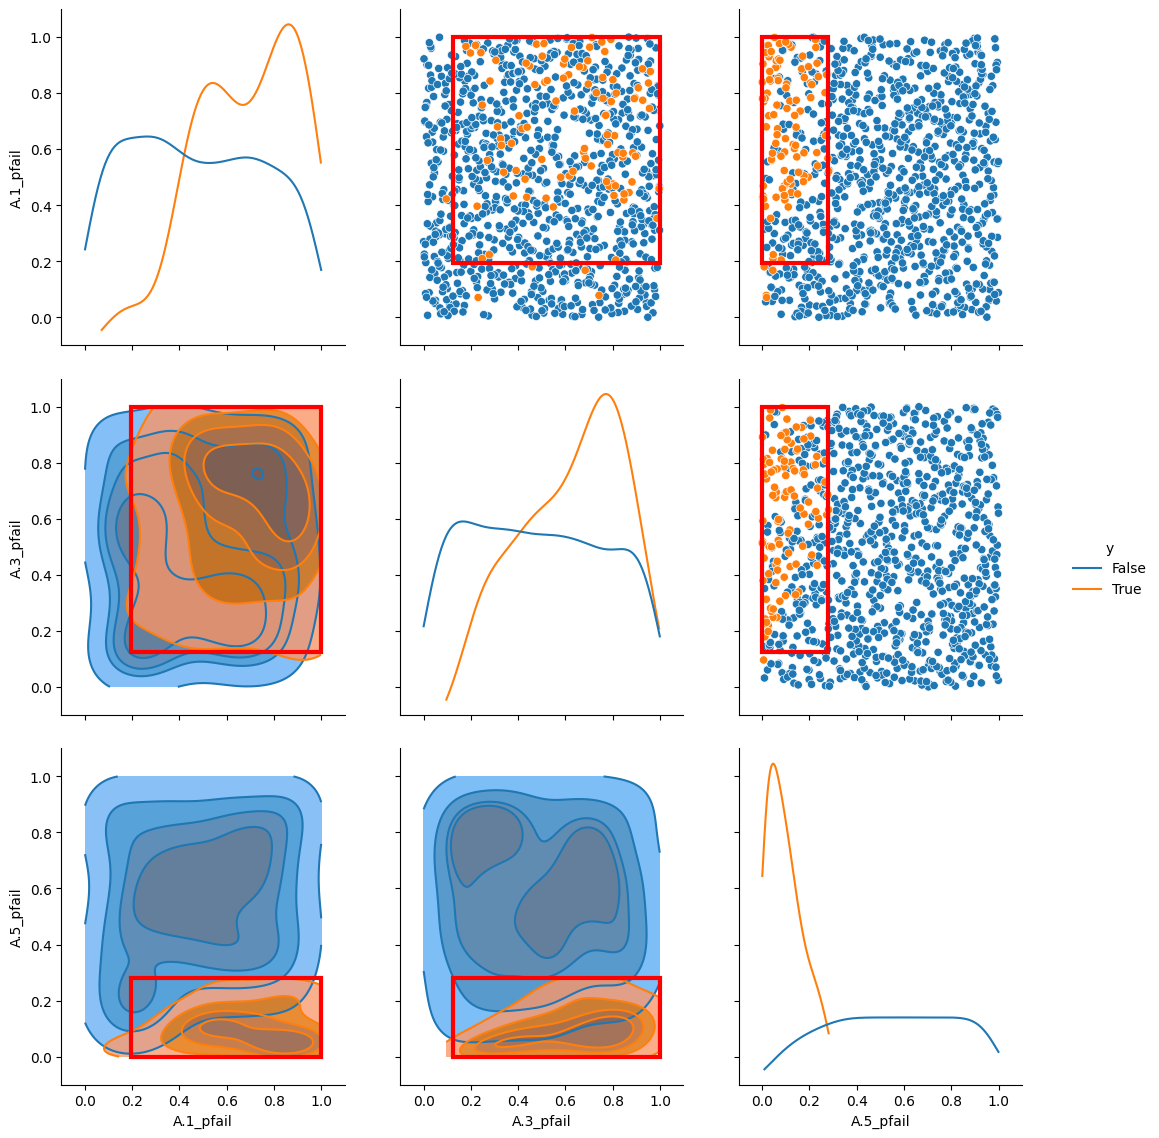

In [83]:
#Further inspect the box limits using pair wise 
box1.select(point_1_2)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [91]:
# inspect point - point with a relatively low density and high coverage

point_1_3 = 13
box1.inspect(point_1_3)

coverage      0.980000
density       0.388889
id           13.000000
k            98.000000
mass          0.252000
mean          0.388889
n           252.000000
res_dim       2.000000
Name: 13, dtype: float64

             box 13                                 
                min       max qp value      qp value
A.5_pfail  0.000873  0.280287      NaN  1.468694e-29
A.3_pfail  0.125412  0.999267  0.13446           NaN



[None]

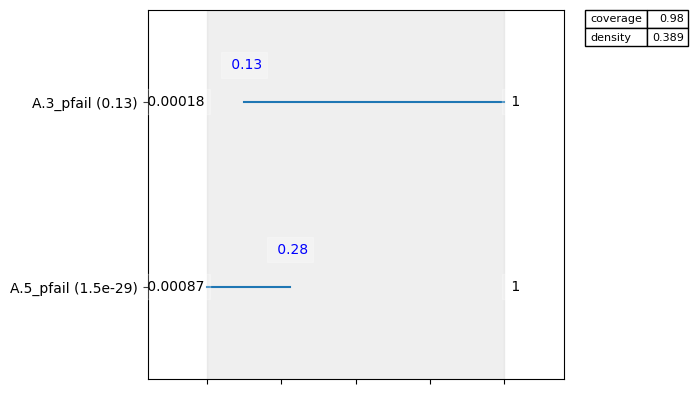

In [92]:
# inspect box limits for the selected point
box1.inspect(point_1_3, style='graph')
plt.show()

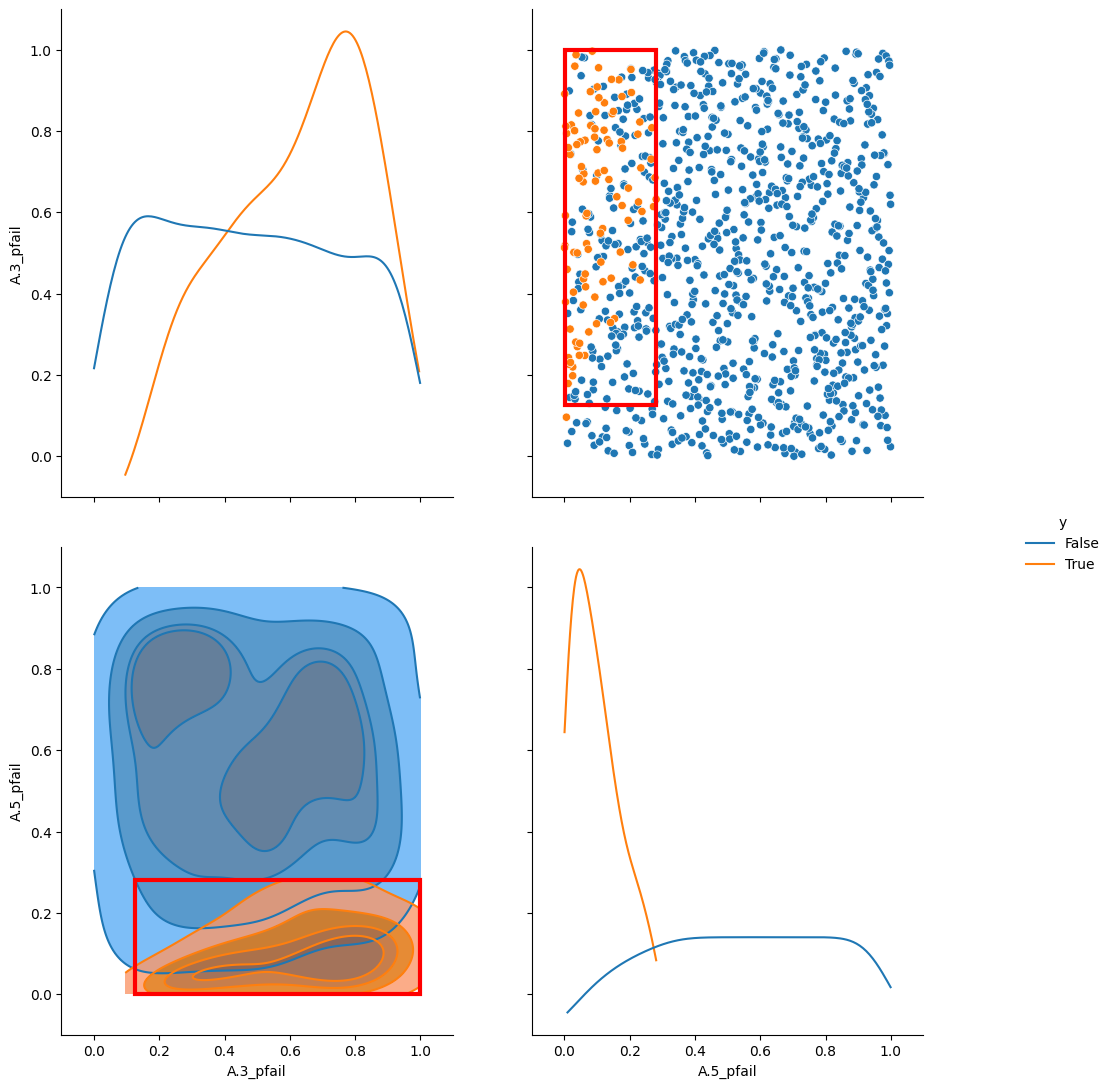

In [93]:
#Further inspect the box limits using pair wise 
box1.select(point_1_3)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Interpret results PRIM 1

- Predominantly higher probabilities that the dikes of rings 2 and 3 (and to a lesser extend dike ring 1) hold, seem to induce high annual damage for Overijssel. These are the dike rings located in Gelderland.
- A low probability that dike ring 5 (Overijssel) holds, seems to be the strongest driver of high annual damage for Overijssel. This is the dike ring where Deventer is located, the main regional urbanisation which is located directly located on the shores of the IJssel river.
- B_max and B_rate seem to be no significant drivers of high annual damage for Overijssel 

PRIM 3: Overijssel Expected Number of Deaths	

In [56]:
# specify x and y variables

# select all uncertainties and policy levers. Therefore, only disregard the last three columns, which don't display usefull information

x_3 = df_experiments.iloc[:, :-3]

# as taregt, look at the Overijssel Expected Number of Deaths, where the threshold damage value is set to the maximum 10% percentile of the expected annual damage
y_3 = df_outcomes['Overijssel Expected Number of Deaths'] > df_outcomes['Overijssel Expected Number of Deaths'].quantile(0.9)

In [57]:
# create third box (x_3 = independent variable, y_3 = dependent variable)

prim_alg = prim.Prim(x_3, y_3, threshold=0.8, peel_alpha=0.1)
box3 = prim_alg.find_box()


c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


Box inspections

To explore under which conditions the damage is high, three possible boxes are inspected: 
- One with a high density, relatively low coverage and the highest number of restricted dimensions
- One with a moderate density, coverage and number of restricted dimensions
- One with a relatively low density, high coverage and a low number of restricted dimensions

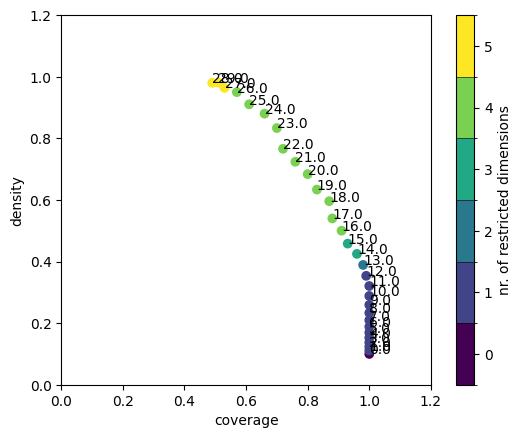

In [58]:
# Plot the density - coverage trade-off

box3.show_tradeoff(annotated=True)
plt.show()

In [96]:
# inspect points - point with a high density and relatively low coverage

point_3_1 = 27
box3.inspect(point_3_1)

coverage     0.530000
density      0.963636
id          27.000000
k           53.000000
mass         0.055000
mean         0.963636
n           55.000000
res_dim      5.000000
Name: 27, dtype: float64

                            box 27                                        
                               min         max      qp value      qp value
A.5_pfail                 0.000873    0.168088           NaN  6.445150e-33
A.1_pfail                 0.419023    0.999021  1.404715e-07           NaN
A.3_pfail                 0.309302    0.999267  1.221392e-03           NaN
A.2_pfail                 0.132408    0.999393  1.193882e-02           NaN
A.0_ID flood wave shape  15.000000  132.000000  4.768032e-01           NaN



[None]

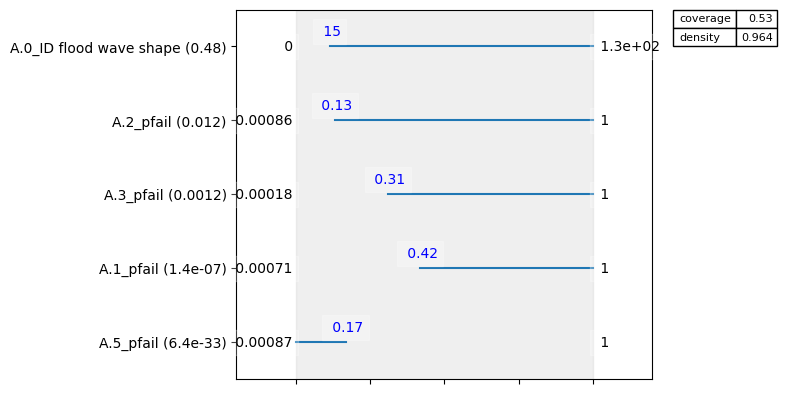

In [100]:
# inspect box limits for the selected point
box3.inspect(point_3_1, style='graph')
plt.show()

In [98]:
# Resample the box to check the relevance of the above identified parameters > only if works with parameters!
# box3.resample(point_3_1)


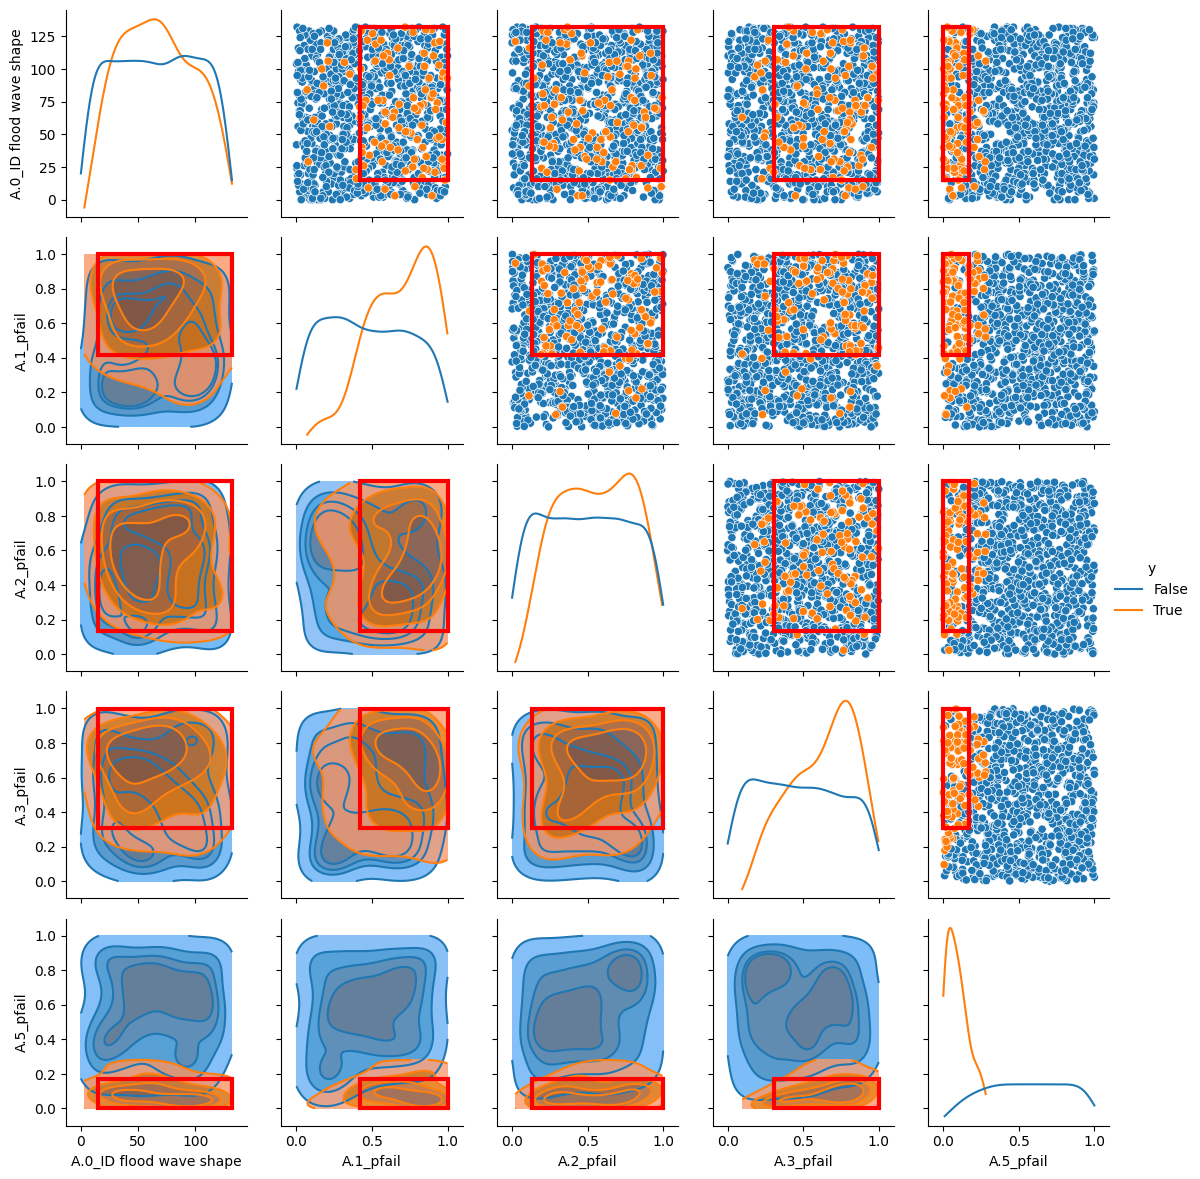

In [99]:
#Further inspect the box limits using pair wise 
box3.select(point_3_1)
box3.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [101]:
# inspect points - point with a moderate density and moderate coverage

point_3_2 = 17
box3.inspect(point_3_2)

coverage      0.880000
density       0.539877
id           17.000000
k            88.000000
mass          0.163000
mean          0.539877
n           163.000000
res_dim       4.000000
Name: 17, dtype: float64

             box 17                                  
                min       max  qp value      qp value
A.5_pfail  0.000873  0.280287       NaN  2.411053e-29
A.1_pfail  0.262813  0.999021  0.003043           NaN
A.2_pfail  0.132408  0.999393  0.125193           NaN
A.3_pfail  0.125412  0.999267  0.155947           NaN



[None]

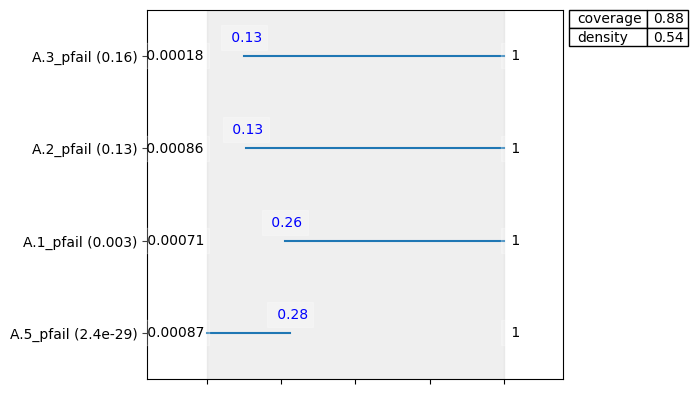

In [102]:
# inspect box limits for the selected point
box3.inspect(point_3_2, style='graph')
plt.show()

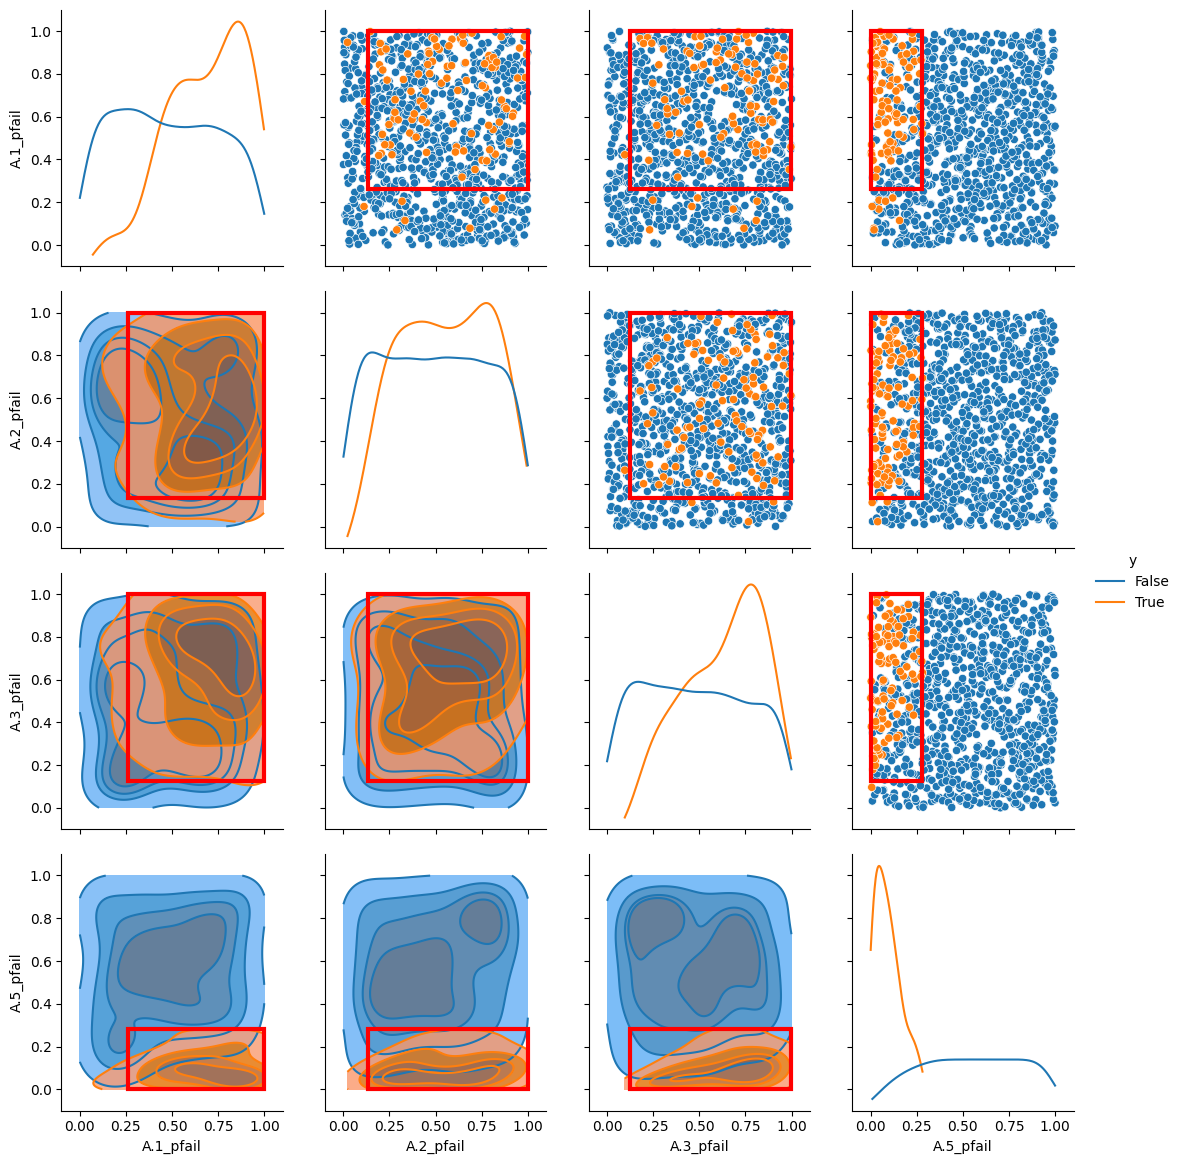

In [103]:
#Further inspect the box limits using pair wise 
box3.select(point_3_2)
box3.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [110]:
# inspect points - point with a relatively low density and high coverage

point_3_3 = 13
box3.inspect(point_3_3)

coverage      0.980000
density       0.388889
id           13.000000
k            98.000000
mass          0.252000
mean          0.388889
n           252.000000
res_dim       2.000000
Name: 13, dtype: float64

             box 13                                 
                min       max qp value      qp value
A.5_pfail  0.000873  0.280287      NaN  1.468694e-29
A.3_pfail  0.125412  0.999267  0.13446           NaN



[None]

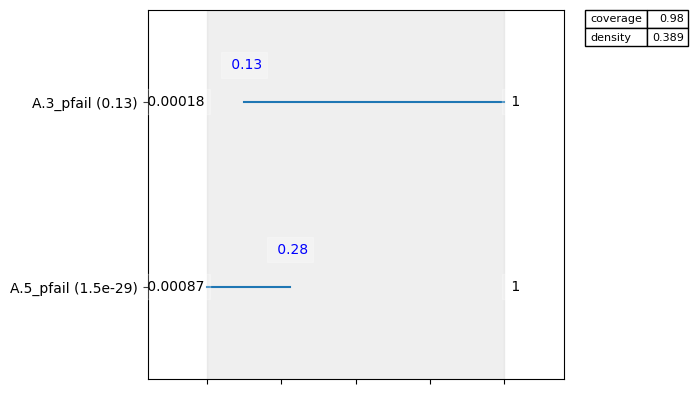

In [111]:
# inspect box limits for the selected point
box3.inspect(point_3_3, style='graph')
plt.show()

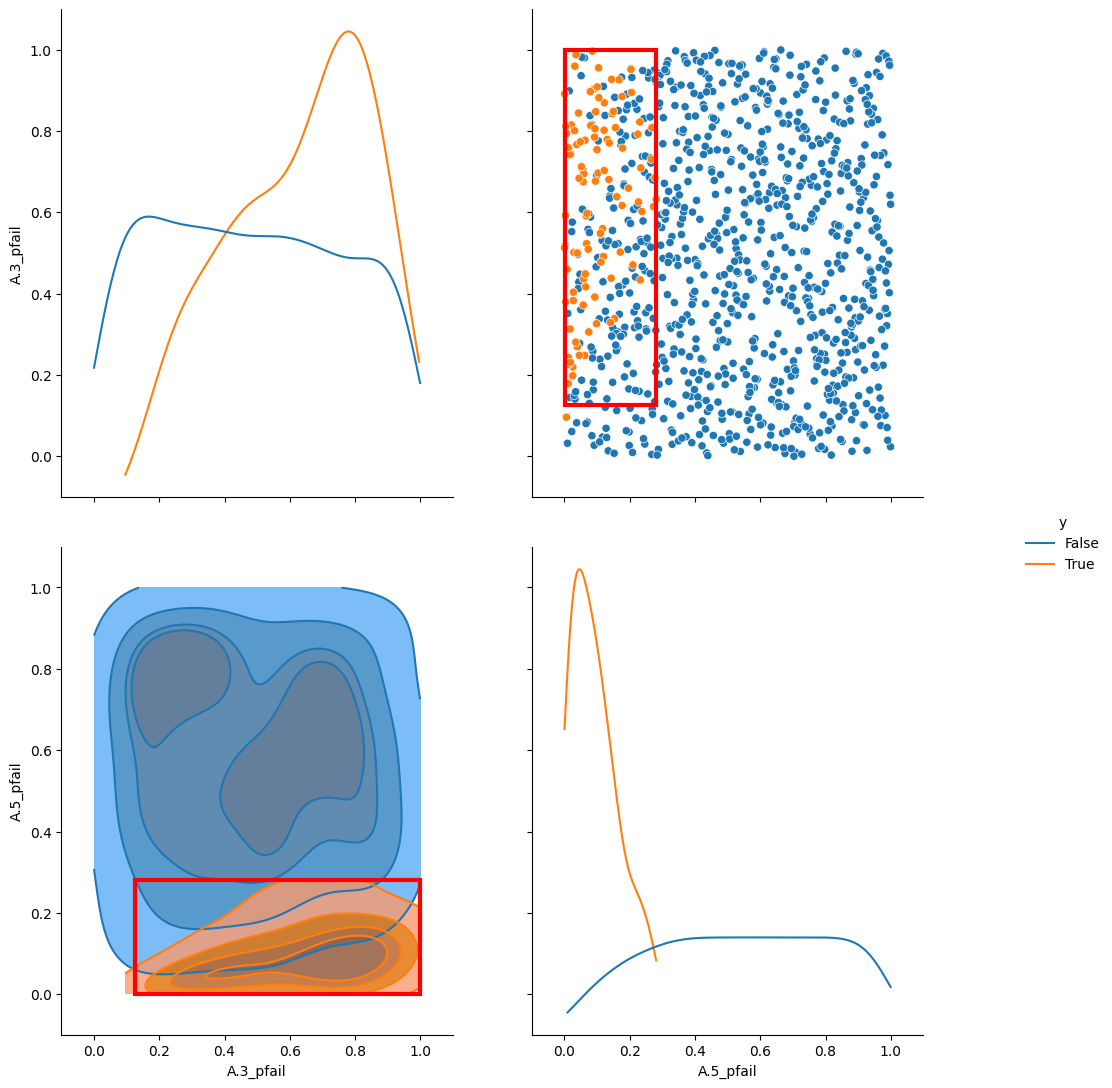

In [112]:
#Further inspect the box limits using pair wise 
box3.select(point_3_3)
box3.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Intepret PRIM 3

- Similar findings as for annual damage Overijssel

PRIM 4: RfR Total Costs	(NOT RELEVANT FOR SAMPLE/THIS ANALYSIS)

In [6]:
# specify x_4 and y_4 variables

# select all uncertainties and policy levers. Therefore, only disregard the last three columns, which don't display usefull information

x_4 = df_experiments.iloc[:, :-3]

# as taregt, look at the Overijssel Expected Annual Damage, where the threshold damage value is 4.639333e+08 (> mean value data set)
y_4 = df_outcomes['RfR Total Costs'] > 4.639333e+08

In [7]:
# create third box (x_4 = independent variable, y_4 = dependent variable)

prim_alg = prim.Prim(x_4, y_4, threshold=0.8, peel_alpha=0.1)
box4 = prim_alg.find_box()


[MainProcess/INFO] 300 points remaining, containing 100 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.3333333333333333, coverage: 1.0, density: 1.0 restricted_dimensions: 1


In [ ]:
# Plot the density - coverage trade-off

box4.show_tradeoff(annotated=True)
plt.show()

In [ ]:
# inspect point

point =  x
box4.inspect(point)

In [ ]:
# inspect box limits for the selected point
box4.inspect(point, style='graph')
plt.show()

Interpret PRIM 4  

Same as with dike investment costs, the RfR costs only depend on the RfR policy lever

PRIM 5: Expected Evacuation Costs (NOT RELEVANT FOR SAMPLE/THIS ANALYSIS)


In [10]:
# specify x_5 and y_5 variables

# select all uncertainties and policy levers. Therefore, only disregard the last three columns, which don't display usefull information

x_5=df_experiments.iloc[:, :-3]

# as taregt, look at the Overijssel Expected Annual Damage, where the threshold damage value is 4.639333e+08 (> mean value data set)
y_5= df_outcomes['Expected Evacuation Costs'] > 0

In [11]:
# create third box (x_5 = independent variable, y_5 = dependent variable)

prim_alg = prim.Prim(x_5, y_5, threshold=0.8, peel_alpha=0.1)
box5 = prim_alg.find_box()


AssertionError: 